In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

     |████████████████████████████████| 15.9MB 424kB/s eta 0:00:01    |█████                           | 2.5MB 4.9MB/s eta 0:00:03
     |████████████████████████████████| 512kB 24.1MB/s eta 0:00:01
     |████████████████████████████████| 14.3MB 705kB/s eta 0:00:01    |██▏                             | 983kB 4.8MB/s eta 0:00:03     |█████                           | 2.2MB 4.8MB/s eta 0:00:03
     |████████████████████████████████| 122kB 19.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.2MB/s eta 0:00:01
     |████████████████████████████████| 215kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 27.3MB 286kB/s  eta 0:00:01   |████▌                           | 3.8MB 4.8MB/s eta 0:00:05     |███████████████▉                | 13.5MB 17.0MB/s eta 0:00:01     |██████████████████████          | 18.8MB 17.0MB/s eta 0:00:01     |███████████████████████▏        | 19.8MB 17.0MB/s eta 0:00:01     |██████████████████████████████▍ | 25.9MB 17.0MB/s eta 0:00:01


**Pandas**: Works with the data

**Matplotlib**: Plots the charts

**Seaborn**: Makes the charts prettier

Normally you can also import **NumPy** but pandas incoporates it in, so we don't need to explicitly import it. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")

The read_csv() function is in the pandas document. We are creating a Data Frame (df) by reading the csv file.

In [36]:
df = pd.read_csv('fortune500.csv')

df.head() is the same as pandas.read_csv('fortune500.csv').head(), and it shows the first five rows  while df.tail() shows the last five rows of the data set.

In [37]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [38]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [39]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [40]:
len(df)

25500

In [41]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

# Optional Section - Double checking your dataset 

Huh. Why isn't the profit column a float64? Profits would be numbers. This means there must be some non-integer values. The `[^0-9.-]` expression makes sure to check for values that **don't** include the numbers 0-9, . and -.

In [42]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


We should check to see if there are other values that are strings in this set. We can create a set of the values in df, through the following code.

In [43]:
set(df.profit[non_numberic_profits])

{'N.A.'}

Alright, we only have one type, which is nice. Let's see how many profits have N.A.

In [44]:
len(df.profit[non_numberic_profits])

369

Considering how big our set is, that's about 1.5% of the set, so not completely inconsequential. 

If the rows containing N.A are roughly, uniformly distributed over the years, the easiest solution would be to remove them. 

Let's look at the distribution

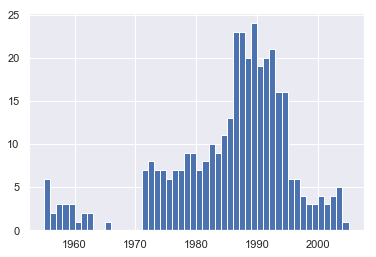

In [45]:
bin_sizes,_,_ = plt.hist(df.year[non_numberic_profits], bins=range(1955,2006))

This chart shows the number of invalid values per year, the highest being 25, and most below that value. Since there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. We'll say this is acceptable. 

In [46]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [47]:
len(df)

25131

In [48]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Now we're ready to go!

# Plotting with matplotlib

Let's start by plotting the average profit by year. Let's also plot the revenue too. 

In [49]:
# Group by a label
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x,y,ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0,y=0)

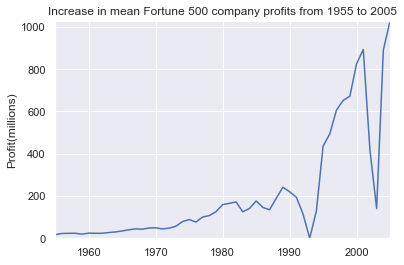

In [50]:
fig, ax = plt.subplots()
plot(x,y1,ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit(millions)')

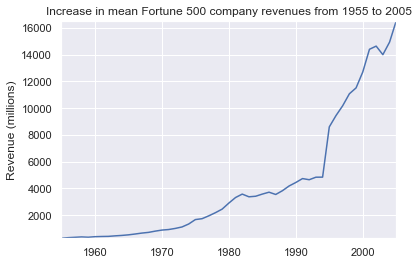

In [51]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


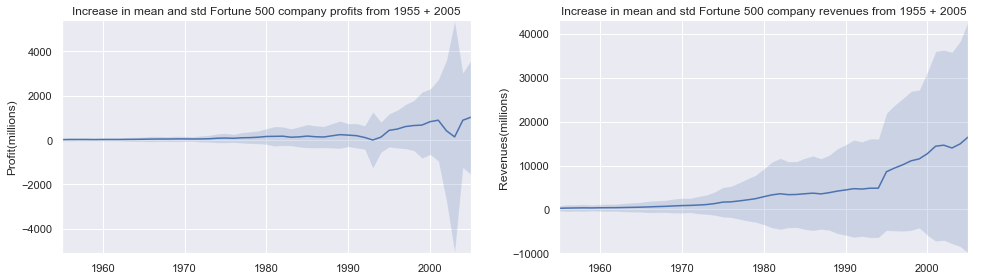

In [52]:
def plot_with_std(x,y, stds, ax, title, y_label):
    ax.fill_between(x,y - stds, y + stds, alpha=0.2)
    plot(x,y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 + 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y1.as_matrix(), stds1, ax1, title % 'profits', 'Profit(millions)')
plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenues(millions)')
fig.set_size_inches(14,4)
fig.tight_layout()